In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import rc
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import random

plt.rcParams["font.family"] = 'CMU Concrete'

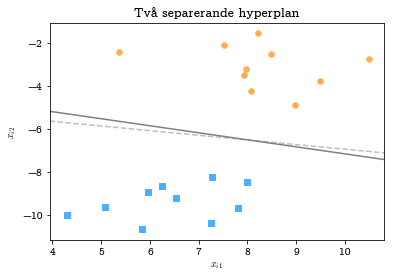

In [45]:
X, y = make_blobs(n_samples=20, centers=2, random_state=6)
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
clf2 = svm.SVC(kernel='linear', C=0.005)
clf2.fit(X,y)

X0, y0 = [], []
X1, y1 = [], []
for i in range(20):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(10,2))
X1 = np.reshape(X1, newshape=(10,2))

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
Z2 = clf2.decision_function(xy).reshape(XX.shape)
#ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#           linestyles=['--', '-', '--'])

ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])
ax.contour(XX, YY, Z2, colors='grey', levels=[0], alpha=0.5,
           linestyles=['--'])

#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
plt.title("Två separerande hyperplan")
plt.xlabel(r'$x_{i1}$')
plt.ylabel(r'$x_{i2}$')

pp = PdfPages('KandFigur1.pdf')
plt.savefig(pp, format='pdf')
pp.close()

#plt.show()

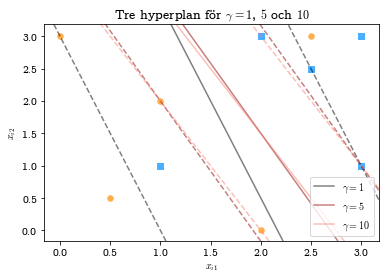

In [93]:
X = np.reshape([[2,3], [2.5,2.5], [3,1], [3,3], [0,3], [1,2], [2,0], [0.5,0.5], [2.5,3], [1,1]], newshape=(10,2))
y = [1,1,1,1,0,0,0,0,0,1]
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
clf2 = svm.SVC(kernel='linear', C=5)
clf2.fit(X, y)
clf3 = svm.SVC(kernel='linear', C=10)
clf3.fit(X, y)


X0, y0 = [], []
X1, y1 = [], []
for i in range(10):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(5,2))
X1 = np.reshape(X1, newshape=(5,2))

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
Z2 = clf2.decision_function(xy).reshape(XX.shape)
Z3 = clf3.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.contour(XX, YY, Z2, colors='darkred', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.contour(XX, YY, Z3, colors='salmon', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

#ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
#           linestyles=['-'])

#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
#ax.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
#ax.scatter(clf3.support_vectors_[:, 0], clf3.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

plt.title(r"Tre hyperplan för $\gamma=1$, $5$ och $10$")
plt.xlabel(r'$x_{i1}$')
plt.ylabel(r'$x_{i2}$')


gamma1 = mlines.Line2D([], [], color='black', alpha=0.5, label=r'$\gamma=1$')
gamma5 = mlines.Line2D([], [], color='darkred', alpha=0.5, label=r'$\gamma=5$')
gamma10 = mlines.Line2D([], [], color='salmon', alpha=0.5, label=r'$\gamma=10$')

plt.legend(handles=[gamma1, gamma5, gamma10])

pp = PdfPages('KandFigur2.pdf')
plt.savefig(pp, format='pdf')
pp.close()

#plt.show()

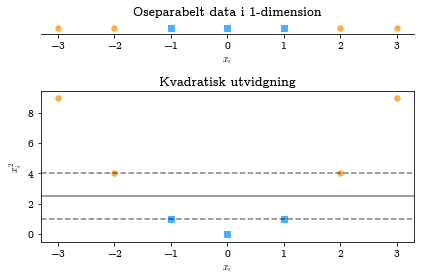

In [128]:
X = np.reshape([[-3,0],[-2,0],[-1,0],[0,0],[1,0],[2,0],[3,0]], newshape=(7,2))
y = [0,0,1,1,1,0,0]

X0, y0 = [], []
X1, y1 = [], []
for i in range(7):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(4,2))
X1 = np.reshape(X1, newshape=(3,2))

plot = plt.figure()


#ax = plt.subplot(2, 1, 1)
ax = plt.subplot2grid((4, 1), (0, 0))

ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.set_ylim(-0.5, 0.5)



plt.title("Oseparabelt data i 1-dimension")
plt.xlabel(r'$x_{i}$')

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
xlim = ax.get_xlim()
ylim = ax.get_ylim()


#ax = plt.subplot(2, 1, 2)

ax = plt.subplot2grid((4, 1), (1, 0), rowspan=3)

X[:, 1] = X[:,0] * X[:,0]

clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X, y)

X0, y0 = [], []
X1, y1 = [], []
for i in range(7):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(4,2))
X1 = np.reshape(X1, newshape=(3,2))

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
Z2 = clf2.decision_function(xy).reshape(XX.shape)
Z3 = clf3.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

#ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
#           linestyles=['-'])

#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
#ax.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
#ax.scatter(clf3.support_vectors_[:, 0], clf3.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

plt.xlabel(r'$x_{i}$')
plt.ylabel(r'$x_{i}^{2}$')
plt.title("Kvadratisk utvidgning")

#gamma1 = mlines.Line2D([], [], color='black', alpha=0.5, label=r'$\gamma=1$')
#gamma5 = mlines.Line2D([], [], color='darkred', alpha=0.5, label=r'$\gamma=5$')
#gamma10 = mlines.Line2D([], [], color='salmon', alpha=0.5, label=r'$\gamma=10$')

#plt.legend(handles=[gamma1, gamma5, gamma10])
plt.tight_layout()

pp = PdfPages('KandFigur3.pdf')
plt.savefig(pp, format='pdf')
pp.close()

#plt.show()

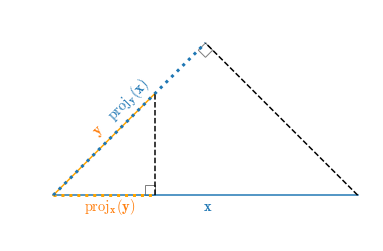

In [99]:
x1, y1 = [0, 2], [0, 2]
x2, y2 = [0, 6], [0, 0]
x3, y3 = [2, 2], [0, 2]
x4, y4 = [0, 2], [0, 0]
x5, y5 = [0, 3], [0, 3]
x6, y6 = [6, 3], [0, 3]
plot = plt.plot(x2, y2)

#plt.ylim(bottom=-0.1, top=3.1)
#plt.xlim(left=-0.1, right=6.1)
ax = plt.gca()
ax.add_line(mlines.Line2D(x1, y1, color='orange'))
ax.add_line(mlines.Line2D(x3, y3, color='black', linestyle='--'))
ax.add_line(mlines.Line2D(x4, y4, color='orange', linestyle=':', alpha=1, linewidth=3))
ax.add_line(mlines.Line2D(x5, y5, linestyle=':', alpha=1, linewidth=3))
ax.add_line(mlines.Line2D(x6, y6, color='black', linestyle='--'))
size=0.2
ax.add_patch(patches.Rectangle([2-size, 0], width=size, height=size, color='black', alpha=0.5, fill=False))
ax.add_patch(patches.Rectangle([3, 3], width=size, height=size, angle=45+180, color='black', alpha=0.5, fill=False))
ax.text(2.95,-0.3,'$\mathbf{x}$', color='C0', fontsize='x-large')
ax.text(0.75,1.25,'$\mathbf{y}$', rotation=45, color='C1', fontsize='x-large')
ax.text(0.6,-0.3,'$\operatorname{proj}_{\mathbf{x}}(\mathbf{y})$', fontsize='x-large',  color='C1', fontweight='bold')
ax.text(1,2.1,'$\operatorname{proj}_{\mathbf{y}}(\mathbf{x})$', fontsize='x-large',  color='C0', rotation=45, fontweight='bold')
ax.set_aspect('equal', 'datalim')
bottom, top = plt.ylim()
#left, right = plt.xlim()
plt.ylim(top=top+1.5, bottom=bottom+1.5)
plt.axis('off')
#plt.show()

pp = PdfPages('KandFigur4.pdf')
plt.savefig(pp, format='pdf')
pp.close()

<Figure size 432x288 with 0 Axes>

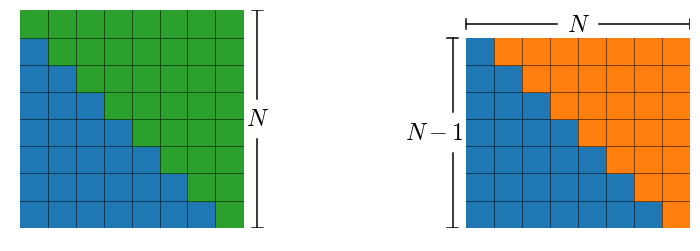

In [94]:
size = plt.figure().get_size_inches()
plot = plt.figure(figsize=(size[0]*2,size[1]))
ax = plt.gca()
plt.ylim(top=8, bottom=0)
plt.xlim(left=0, right=24)
#ax.set_aspect('equal', 'datalim')
x1, y1 = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7], [0,7,7,6,6,5,5,4,4,3,3,2,2,1,1,0]
xy = np.array([x1, y1]).T
ax.add_patch(patches.Polygon(xy))
x1 = np.array(x1) + 16
xy = np.array([x1, y1]).T
ax.add_patch(patches.Polygon(xy))
y1 = [7,6,6,5,5,4,4,3,3,2,2,1,1,0,0,7]
x1 = x1 + 1
xy = np.array([x1, y1]).T
ax.add_patch(patches.Polygon(xy, color='C1'))
x1, y1 = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8], [8,7,7,6,6,5,5,4,4,3,3,2,2,1,1,0,0,8]
xy = np.array([x1, y1]).T
ax.add_patch(patches.Polygon(xy, color='C2'))
for i in range(1,8):
    x, y = [i, i], [0, 8]
    ax.add_line(mlines.Line2D(x,y, color='black', linewidth=1, alpha=0.5))
    ax.add_line(mlines.Line2D(y,x, color='black', linewidth=1, alpha=0.5))
    x, y = [i+16, i+16], [0, 7]
    ax.add_line(mlines.Line2D(x,y, color='black', linewidth=1, alpha=0.5))
for i in range(1,7):
    x, y = [16, 24], [i, i]
    ax.add_line(mlines.Line2D(x,y, color='black', linewidth=1, alpha=0.5))
#ax.text(9,5,'$N^2$', fontsize=24)
#ax.text(11,5.2, '$-$', fontsize=24)
#ax.text(9,5,'$N^2$', fontsize=24)
plt.axis('off')
l1xp = 8.5
gap = 1.5
ax.add_line(mlines.Line2D([l1xp,l1xp], [0,4-gap/2], color='black'))
ax.add_line(mlines.Line2D([l1xp,l1xp], [4+gap/2,8], color='black'))
buttsize = 0.2
ax.add_line(mlines.Line2D([l1xp-buttsize,l1xp+buttsize], [8,8], color='black'))
ax.add_line(mlines.Line2D([l1xp-buttsize,l1xp+buttsize], [0,0], color='black'))
ax.text(l1xp-0.4, 4.2-0.45, '$N$', fontsize=24)
l1xp = 15.5
ax.add_line(mlines.Line2D([l1xp,l1xp], [0,3.5-gap/2], color='black'))
ax.add_line(mlines.Line2D([l1xp,l1xp], [3.5+gap/2,7], color='black'))
buttsize = 0.2
ax.add_line(mlines.Line2D([l1xp-buttsize,l1xp+buttsize], [7,7], color='black'))
ax.add_line(mlines.Line2D([l1xp-buttsize,l1xp+buttsize], [0,0], color='black'))
ax.text(l1xp-1.7, 3.7-0.45, '$N-1$', fontsize=24)
l1xp=7.5
gap = 1.5
ax.add_line(mlines.Line2D([16+0,16+4-gap/2], [l1xp,l1xp], color='black'))
ax.add_line(mlines.Line2D([16+4+gap/2,16+8], [l1xp,l1xp], color='black'))
buttsize = 0.2
ax.add_line(mlines.Line2D([16,16], [l1xp-buttsize,l1xp+buttsize], color='black'))
ax.add_line(mlines.Line2D([24,24], [l1xp-buttsize,l1xp+buttsize], color='black'))
ax.text(19.6, 7.2, '$N$', fontsize=24)

#plt.show()

pp = PdfPages('KandFigur5.pdf')
plt.savefig(pp, format='pdf')
pp.close()

In [2]:
n=25
xmax=6
ymax=4
K=4
X=[]
y=[]
for k in range(K):
    for i in range(xmax):
        for j in range(ymax):
#            X.append([random.uniform(i,i+1),random.uniform(j,j+1)])
            X.append([random.normalvariate(mu=i+0.5, sigma=0.2), random.normalvariate(mu=j+0.5, sigma=0.2)])
            if (i % 2 == 0) != (j % 2 == 0):
                y.append(1)
            else:
                y.append(0)
for i in range(K*xmax*ymax,K*xmax*ymax+n):
    X.append([random.uniform(0,xmax),random.uniform(0,ymax)])
    if ((X[i][0] % 2 < 1) != (X[i][1] % 2 < 1)):
        y.append(1)
    else:
        y.append(0)

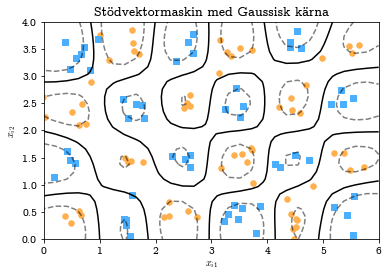

In [6]:
#X, y = make_blobs(n_samples=n, centers=2, random_state=2, cluster_std=2)
X = np.reshape(X, newshape=(n+K*xmax*ymax,2))
C = 10
clf = svm.SVC(kernel='rbf', C=C, gamma=1)
#clf = svm.SVC(kernel='linear', C=C)
#clf = svm.SVC(kernel='poly', C=C, degree=32)
clf.fit(X, y)

X0, y0 = [], []
X1, y1 = [], []
for i in range(n+K*xmax*ymax):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(len(X0),2))
X1 = np.reshape(X1, newshape=(len(X1),2))

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
ax = plt.gca()
ax.set_xlim(left=0, right=6)
ax.set_ylim(bottom=0, top=4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#ax.set_aspect('equal', 'datalim')

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,1], alpha=0.5,
           linestyles=['--'])
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
           linestyles=['-'])
plt.xlabel(r'$x_{i1}$')
plt.ylabel(r'$x_{i2}$')
plt.title("Stödvektormaskin med Gaussisk kärna")
#plt.show()

pp = PdfPages('KandFigur6.pdf')
plt.savefig(pp, format='pdf')
pp.close()

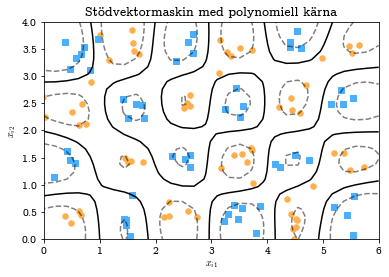

In [7]:
#X, y = make_blobs(n_samples=n, centers=2, random_state=2, cluster_std=2)
X = np.reshape(X, newshape=(n+K*xmax*ymax,2))
C = 10
clf = svm.SVC(kernel='rbf', C=C, gamma=1)
#clf = svm.SVC(kernel='linear', C=C)
#clf = svm.SVC(kernel='poly', C=C, degree=32)
clf.fit(X, y)

X0, y0 = [], []
X1, y1 = [], []
for i in range(n+K*xmax*ymax):
    if y[i]==0:
        X0.append(X[i, :])
        y0.append(y[i])
    else:
        X1.append(X[i, :])
        y1.append(y[i])
X0 = np.reshape(X0, newshape=(len(X0),2))
X1 = np.reshape(X1, newshape=(len(X1),2))

plt.scatter(X0[:, 0], X0[:, 1], c="#ffaf4b", s=30, marker='o')
plt.scatter(X1[:, 0], X1[:, 1], c="#4bafff", s=30, marker='s')
ax = plt.gca()
ax.set_xlim(left=0, right=6)
ax.set_ylim(bottom=0, top=4)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#ax.set_aspect('equal', 'datalim')

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,1], alpha=0.5,
           linestyles=['--'])
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1,
           linestyles=['-'])
plt.xlabel(r'$x_{i1}$')
plt.ylabel(r'$x_{i2}$')
plt.title("Stödvektormaskin med polynomiell kärna")
#plt.show()

pp = PdfPages('KandFigur7.pdf')
plt.savefig(pp, format='pdf')
pp.close()